# 1. Import and Install Dependencies

In [4]:
!pip install --user --upgrade protobuf

In [5]:
!pip install --user mediapipe 

     ---------------------------------------- 0.0/904.4 kB ? eta -:--:--
     ---------------------------------------- 10.2/904.4 kB ? eta -:--:--
     - ----------------------------------- 30.7/904.4 kB 325.1 kB/s eta 0:00:03
     -- ---------------------------------- 71.7/904.4 kB 491.5 kB/s eta 0:00:02
     -------- ----------------------------- 204.8/904.4 kB 1.0 MB/s eta 0:00:01
     -------------- ----------------------- 337.9/904.4 kB 1.4 MB/s eta 0:00:01
     ------------------------ ------------- 583.7/904.4 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 870.4/904.4 kB 2.6 MB/s eta 0:00:01
     -------------------------------------  901.1/904.4 kB 2.6 MB/s eta 0:00:01
     -------------------------------------- 904.4/904.4 kB 2.2 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.5.26 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [7]:
import tensorflow


In [8]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    #mp_holistic = mp.solutions.holistic() 
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
len(results.face_landmarks.landmark)

468

In [15]:
results

mediapipe.python.solution_base.SolutionOutputs

In [16]:
draw_landmarks(frame, results)

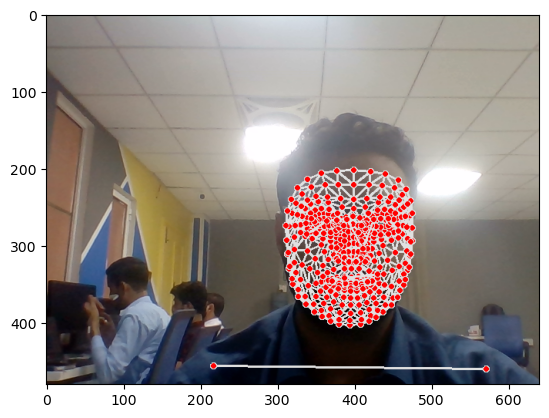

In [17]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [18]:
len(results.face_landmarks.landmark)

468

In [19]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [20]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [21]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 0.64295417,  0.63456243, -1.50862682, ...,  0.        ,
        0.        ,  0.        ])

In [25]:
np.save('0', result_test)

In [26]:
np.load('0.npy')

array([ 0.64295417,  0.63456243, -1.50862682, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [30]:
import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA'

# Actions that we try to detect
actions = np.array(['where', 'is', 'washroom', 'what', 'prohibited'])

# Thirty videos worth of data
no_sequences = 150

# Videos are going to be 30 frames in length
sequence_length = 150

try:
    os.makedirs(DATA_PATH)
except FileExistsError:
    print(f"Directory already exists: {DATA_PATH}")

# Loop through actions and sequences to create subdirectories
for action in actions:
    action_path = os.path.join(DATA_PATH, action)

    # Create a subdirectory for each action if it doesn't exist
    try:
        os.makedirs(action_path)
    except FileExistsError:
        print(f"Directory already exists: {action_path}")

    # Loop through sequences aka videos
    for sequence in range(1, no_sequences + 1):  # Adjust the range to start from 1
        sequence_path = os.path.join(action_path, str(sequence))

        # Create a subdirectory for each sequence if it doesn't exist
        try:
            os.makedirs(sequence_path)
        except FileExistsError:
            print(f"Directory already exists: {sequence_path}")
'''
        # Loop through frames in the sequence
        for frame_num in range(sequence_length):
            # Extract and save keypoints (replace `extract_keypoints(results)` with actual code)
            keypoints = extract_keypoints(results)
            
            # Sample code for saving a placeholder numpy array
            #keypoints = np.random.rand(10, 2)  # Example random keypoints
            npy_path = os.path.join(sequence_path, str(frame_num))
            print(f"Saving keypoints to: {npy_path}")
            np.save(npy_path, keypoints)
'''
# Folder start
start_folder = 1

Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\1
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\2
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\3
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\4
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\5
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\6
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\7
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\8
Directory already exists: C:/Users/ASIM/Anaconda3/envs/Untitled Folder/MP_DATA\where\9
Directory already exists: C:/Users/ASIM/Anaconda3/env

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [41]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [42]:
label_map = {label:num for num, label in enumerate(actions)}

In [43]:
label_map

{'where': 0, 'is': 1, 'washroom': 2, 'what': 3, 'prohibited': 4}

In [44]:
sequences, labels = [], []

for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        try:
            for frame_num in range(sequence_length):
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
            sequences.append(window)
            labels.append(label_map[action])
        except FileNotFoundError:
            print(f"File not found for action: {action}, sequence: {sequence}. Skipping...")
            continue

'''
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])'''

'\nsequences, labels = [], []\nfor action in actions:\n    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):\n        window = []\n        for frame_num in range(sequence_length):\n            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))\n            window.append(res)\n        sequences.append(window)\n        labels.append(label_map[action])'

In [45]:
np.array(sequences).shape

(750, 150, 1662)

In [46]:
#data = sequence.reshape(sequence.shape[0], sequence.shape[1], 1)

In [47]:
#labels

In [48]:
np.array(labels).shape

(750,)

In [49]:
X = np.array(sequences)

In [50]:
X.shape

(750, 150, 1662)

In [51]:
y = to_categorical(labels).astype(int)
y.shape

(750, 5)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# X_train, valx_test, y_train, valy_test = train_test_split(X_train, y_train, test_size=0.10)

In [71]:
X_train.shape

(675, 150, 1662)

# 7. Build and Train CNN1D Neural Network

In [54]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D,MaxPooling1D, LSTM, Dense, Flatten
#from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2

In [46]:
# Assuming X_train has the shape (num_samples, sequence_length, input_dim)
#num_classes = 17
model = Sequential()

# Add a 1D Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(150,1662)))
#model.add(Conv1D(filters=128,kernel_size=3, activation='relu'))

# Add a MaxPooling layer to downsample
model.add(MaxPooling1D(pool_size=2))

# Add LSTM layers
#model.add(LSTM(128, return_sequences=True, activation='relu'))
#model.add(LSTM(64, return_sequences=True, activation='relu'))
#model.add(LSTM(64, return_sequences=False, activation='relu'))

# Flatten the output from LSTM layers
model.add(Flatten())
#Global average pooling instead of Flatten
#model.add(GlobalAveragePooling1D())
# Add Dense layers for further processing

model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.01)))
#model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.01)))

# Output layer for classification
model.add(Dense(actions.shape[0], activation='softmax'))
'''model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=((X_train.shape[1], X_train.shape[2])),kernel_regularizer=l2(0.01)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))*'''


"model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=((X_train.shape[1], X_train.shape[2])),kernel_regularizer=l2(0.01)))\nmodel.add(LSTM(128, return_sequences=True, activation='relu'))\nmodel.add(LSTM(128, return_sequences=False, activation='relu'))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dense(actions.shape[0], activation='softmax'))*"

In [47]:
#from tensorflow.keras.optimizers import Adam
#optimizer = Adam(learning_rate=0.001)
#from tensorflow.keras.optimizers i

#import SGD
#optimizer=SGD(learning_rate=0.001)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
23/23 [==============================] - 2s 104ms/step - loss: 0.2921 - accuracy: 0.9087
Epoch 2/1000
23/23 [==============================] - 2s 97ms/step - loss: 0.2956 - accuracy: 0.9003
Epoch 3/1000
23/23 [==============================] - 2s 107ms/step - loss: 0.2873 - accuracy: 0.8989
Epoch 4/1000
23/23 [==============================] - 2s 105ms/step - loss: 0.2828 - accuracy: 0.9073
Epoch 5/1000
23/23 [==============================] - 2s 100ms/step - loss: 0.3071 - accuracy: 0.8919
Epoch 6/1000
23/23 [==============================] - 2s 98ms/step - loss: 0.3099 - accuracy: 0.9003
Epoch 7/1000
23/23 [==============================] - 2s 97ms/step - loss: 0.3071 - accuracy: 0.8975
Epoch 8/1000
23/23 [==============================] - 2s 104ms/step - loss: 0.3038 - accuracy: 0.8989
Epoch 9/1000
23/23 [==============================] - 3s 112ms/step - loss: 0.3071 - accuracy: 0.8975
Epoch 10/1000
23/23 [==============================] - 3s 129ms/step - loss: 0.2996 -

23/23 [==============================] - 3s 130ms/step - loss: 0.2314 - accuracy: 0.9171
Epoch 161/1000
23/23 [==============================] - 3s 123ms/step - loss: 0.1926 - accuracy: 0.9410
Epoch 162/1000
23/23 [==============================] - 3s 115ms/step - loss: 0.2029 - accuracy: 0.9382
Epoch 163/1000
23/23 [==============================] - 3s 140ms/step - loss: 0.1802 - accuracy: 0.9494
Epoch 164/1000
23/23 [==============================] - 4s 164ms/step - loss: 0.2173 - accuracy: 0.9312
Epoch 165/1000
23/23 [==============================] - 2s 106ms/step - loss: 0.2636 - accuracy: 0.9199
Epoch 166/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.2277 - accuracy: 0.9298
Epoch 167/1000
23/23 [==============================] - 2s 94ms/step - loss: 0.1878 - accuracy: 0.9494
Epoch 168/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.2011 - accuracy: 0.9354
Epoch 169/1000
23/23 [==============================] - 2s 99ms/step - loss: 0.197

23/23 [==============================] - 2s 87ms/step - loss: 0.1409 - accuracy: 0.9719
Epoch 319/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.1801 - accuracy: 0.9579
Epoch 320/1000
23/23 [==============================] - 2s 86ms/step - loss: 0.1585 - accuracy: 0.9635
Epoch 321/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.1439 - accuracy: 0.9663
Epoch 322/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.1719 - accuracy: 0.9452
Epoch 323/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.1606 - accuracy: 0.9593
Epoch 324/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.1885 - accuracy: 0.9438
Epoch 325/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.1540 - accuracy: 0.9508
Epoch 326/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.1815 - accuracy: 0.9480
Epoch 327/1000
23/23 [==============================] - 2s 90ms/step - loss: 0.1635 - ac

23/23 [==============================] - 2s 105ms/step - loss: 0.1218 - accuracy: 0.9775
Epoch 477/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.1371 - accuracy: 0.9663
Epoch 478/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.1310 - accuracy: 0.9691
Epoch 479/1000
23/23 [==============================] - 2s 96ms/step - loss: 0.1188 - accuracy: 0.9775
Epoch 480/1000
23/23 [==============================] - 2s 96ms/step - loss: 0.1162 - accuracy: 0.9775
Epoch 481/1000
23/23 [==============================] - 2s 98ms/step - loss: 0.1369 - accuracy: 0.9677
Epoch 482/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.1101 - accuracy: 0.9817
Epoch 483/1000
23/23 [==============================] - 2s 100ms/step - loss: 0.1072 - accuracy: 0.9846
Epoch 484/1000
23/23 [==============================] - 2s 90ms/step - loss: 0.1198 - accuracy: 0.9691
Epoch 485/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.1154 - 

23/23 [==============================] - 2s 81ms/step - loss: 0.1030 - accuracy: 0.9803
Epoch 635/1000
23/23 [==============================] - 2s 80ms/step - loss: 0.0977 - accuracy: 0.9831
Epoch 636/1000
23/23 [==============================] - 2s 83ms/step - loss: 0.1891 - accuracy: 0.9410
Epoch 637/1000
23/23 [==============================] - 2s 83ms/step - loss: 0.0939 - accuracy: 0.9860
Epoch 638/1000
23/23 [==============================] - 2s 87ms/step - loss: 0.1490 - accuracy: 0.9607
Epoch 639/1000
23/23 [==============================] - 2s 90ms/step - loss: 0.0992 - accuracy: 0.9817
Epoch 640/1000
23/23 [==============================] - 2s 90ms/step - loss: 0.0936 - accuracy: 0.9817
Epoch 641/1000
23/23 [==============================] - 2s 96ms/step - loss: 0.0976 - accuracy: 0.9803
Epoch 642/1000
23/23 [==============================] - 2s 95ms/step - loss: 0.1003 - accuracy: 0.9733
Epoch 643/1000
23/23 [==============================] - 2s 99ms/step - loss: 0.0917 - ac

23/23 [==============================] - 2s 92ms/step - loss: 0.0785 - accuracy: 0.9860
Epoch 793/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.0769 - accuracy: 0.9874
Epoch 794/1000
23/23 [==============================] - 2s 90ms/step - loss: 0.0832 - accuracy: 0.9874
Epoch 795/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.1212 - accuracy: 0.9621
Epoch 796/1000
23/23 [==============================] - 2s 94ms/step - loss: 0.0883 - accuracy: 0.9803
Epoch 797/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.0918 - accuracy: 0.9789
Epoch 798/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.0758 - accuracy: 0.9874
Epoch 799/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.0842 - accuracy: 0.9831
Epoch 800/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.0755 - accuracy: 0.9888
Epoch 801/1000
23/23 [==============================] - 2s 91ms/step - loss: 0.0742 - ac

23/23 [==============================] - 2s 91ms/step - loss: 0.0649 - accuracy: 0.9902
Epoch 951/1000
23/23 [==============================] - 2s 88ms/step - loss: 0.0666 - accuracy: 0.9916
Epoch 952/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.0620 - accuracy: 0.9916
Epoch 953/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.0682 - accuracy: 0.9888
Epoch 954/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.0773 - accuracy: 0.9831
Epoch 955/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.0742 - accuracy: 0.9860
Epoch 956/1000
23/23 [==============================] - 2s 90ms/step - loss: 0.0737 - accuracy: 0.9860
Epoch 957/1000
23/23 [==============================] - 2s 92ms/step - loss: 0.0698 - accuracy: 0.9902
Epoch 958/1000
23/23 [==============================] - 2s 89ms/step - loss: 0.0761 - accuracy: 0.9846
Epoch 959/1000
23/23 [==============================] - 2s 93ms/step - loss: 0.0636 - ac

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 148, 32)           159584    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 74, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2368)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                151616    
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 5)                 165       
                                                      

# 8. Make Predictions

In [123]:
res = model.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [136]:
actions[np.argmax(res[6])]

'where'

In [137]:
actions[np.argmax(y_test[6])]

'where'

# 9. Save Weights

In [139]:
model.save('sign_language_recognition.h5')

In [98]:
#del model

In [99]:
#model=models.load_weights('action_recognitionbest.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [140]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [141]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 12ms/step


In [142]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [143]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[32,  0],
        [ 0,  6]],

       [[28,  0],
        [ 1,  9]],

       [[30,  2],
        [ 1,  5]],

       [[28,  1],
        [ 1,  8]],

       [[31,  0],
        [ 0,  7]]], dtype=int64)

In [144]:
accuracy_score(ytrue, yhat)

0.9210526315789473

# Classification Report

In [145]:

from sklearn.metrics import classification_report
target_names = ['where', 'is', 'washroom','what','prohibited']  # Replace with your actual class names
report = classification_report(ytrue, yhat, target_names=target_names)

# Print the report
print(report)

              precision    recall  f1-score   support

       where       1.00      1.00      1.00         6
          is       1.00      0.90      0.95        10
    washroom       0.71      0.83      0.77         6
        what       0.89      0.89      0.89         9
  prohibited       1.00      1.00      1.00         7

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



# 11. Test in Real Time

In [34]:
from tensorflow import keras

model = keras.models.load_model('sign_language_recognition.h5')

In [35]:
from scipy import stats

In [36]:
colors = [(245,117,16), (117,245,16), (16,117,245),(217,145,16),(180,200,160)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [37]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: 'NormalizedLandmark' object is not iterable

<Figure size 1800x1800 with 0 Axes>

In [85]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.7


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-150:]
        
        if len(sequence) == 150:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 6ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
where
<class 'medi

1/1 [==============================] - 0s 17ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 77ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
where
<class 'mediapipe.pyth

1/1 [==============================] - 0s 16ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 3ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
where
<class 'mediapipe.pytho

1/1 [==============================] - 0s 15ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 3ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 5ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
where
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
where
<class 'mediapipe.python

1/1 [==============================] - 0s 21ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
is
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 2ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
is
<class 'mediapipe.python.solution_base.SolutionOut

1/1 [==============================] - 0s 30ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 33ms/step
is
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 13ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 3ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 12ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 7ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutpu

1/1 [==============================] - 0s 36ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0

1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 6ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 11ms/step
is
<class 'mediapipe.python.solution_base.SolutionOut

1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 14ms/step
is
<class 'mediapipe.python.solution_base.SolutionOu

1/1 [==============================] - 0s 22ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
prohibited
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
is
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
washroom
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 17ms/step
is
<class 'mediapipe.pyt

In [75]:
cap.release()
cv2.destroyAllWindows()